In [3]:
%%bash
wget "https://pjreddie.com/media/files/yolov3.weights"

--2024-06-22 05:17:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

     0K .......... .......... .......... .......... ..........  0%  700K 5m46s
    50K .......... .......... .......... .......... ..........  0%  713K 5m42s
   100K .......... .......... .......... .......... ..........  0% 35.8M 3m50s
   150K .......... .......... .......... .......... ..........  0%  718K 4m17s
   200K .......... .......... .......... .......... ..........  0% 46.6M 3m27s
   250K .......... .......... .......... .......... ..........  0% 84.2M 2m53s
   300K .......... .......... .......... .......... ..........  0%  184M 2m28s
   350K .......... .......... .......... .......... ..........  0% 1.42M 2m30s
   400K .......... .......... .........

In [4]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2024-06-22 05:18:55--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

     0K ........                                              100% 47.0M=0s

2024-06-22 05:18:55 (47.0 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
CONFIDENCE = 0.6
SCORE_THRESHOLD = 0.6
IOU_THRESHOLD = 0.6

#the neural network configuration
#config_path = "yolov3.cfg"
#weights_path = "yolov3.weights"

labels = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]


# generating colors for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3) , dtype='uint8')

In [45]:
colors.shape

(80, 3)

In [46]:
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")

In [47]:
type(net)

cv2.dnn.Net

In [48]:
import os
image = cv2.imread("jungle.jpg")
imagee = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name = os.path.basename("jungle.jpg")
filename , ext = file_name.split(".")

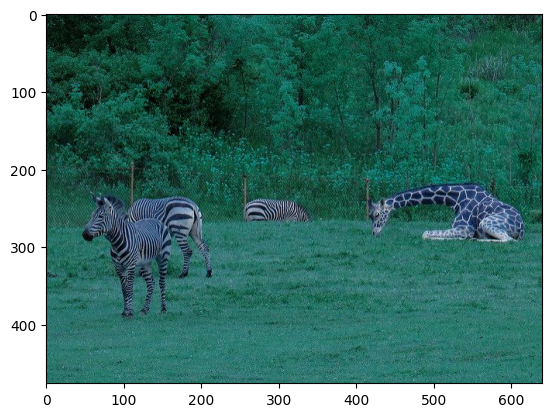

In [49]:
plt.imshow(image)

In [50]:
h , w = image.shape[:2]
# create 4D Blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

In [51]:
blob

array([[[[0.1254902 , 0.07058824, 0.14117648, ..., 0.24313726,
          0.20784314, 0.24705882],
         [0.05882353, 0.1254902 , 0.15686275, ..., 0.18431373,
          0.2       , 0.22352941],
         [0.07058824, 0.12156863, 0.10980392, ..., 0.13725491,
          0.24313726, 0.29411766],
         ...,
         [0.38039216, 0.39215687, 0.39607844, ..., 0.39607844,
          0.4392157 , 0.41568628],
         [0.4       , 0.40784314, 0.40784314, ..., 0.45882353,
          0.42745098, 0.44313726],
         [0.4509804 , 0.44313726, 0.44705883, ..., 0.44705883,
          0.45882353, 0.4392157 ]],

        [[0.16862746, 0.11372549, 0.18431373, ..., 0.3019608 ,
          0.27058825, 0.30980393],
         [0.10196079, 0.16862746, 0.2       , ..., 0.24313726,
          0.2627451 , 0.28627452],
         [0.11372549, 0.16470589, 0.14901961, ..., 0.1882353 ,
          0.29803923, 0.34901962],
         ...,
         [0.42745098, 0.4392157 , 0.44313726, ..., 0.42352942,
          0.46666667, 0.4

In [52]:
ln = net.getLayerNames()

In [53]:
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [54]:

net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [55]:
net.setInput(blob)
ln = net.getLayerNames()
try:
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except:
  ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

layer_outputs = net.forward(ln)

In [56]:
layer_outputs

(array([[0.02843292, 0.03764746, 0.3346372 , ..., 0.        , 0.        ,
         0.        ],
        [0.04464193, 0.03189682, 0.23649533, ..., 0.        , 0.        ,
         0.        ],
        [0.03785736, 0.03157425, 0.8744077 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9548765 , 0.9519622 , 0.49491212, ..., 0.        , 0.        ,
         0.        ],
        [0.95683247, 0.96967983, 0.33590078, ..., 0.        , 0.        ,
         0.        ],
        [0.9579066 , 0.95219886, 0.7742452 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.01701295, 0.0186129 , 0.05584916, ..., 0.        , 0.        ,
         0.        ],
        [0.01356015, 0.01742506, 0.32921213, ..., 0.        , 0.        ,
         0.        ],
        [0.01998024, 0.01897171, 0.08935203, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96804357, 0.9760577 , 0.05060283, ..., 0.        , 0.        ,
         0.        

In [57]:
boxes , confidences , class_ids = [] , [] , []
for output in layer_outputs:
  for detection in output:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > CONFIDENCE:
      box = detection[0:4] * np.array([w, h, w, h])
      (centerX, centerY, width, height) = box.astype("int")
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))
      boxes.append([x, y, int(width), int(height)])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [58]:
labels[24]

'backpack'

In [61]:
for i in range(len(boxes)):
  x,y = boxes[i][0] , boxes[i][1]
  w,h = boxes[i][2] , boxes[i][3]
  color = [int(c) for c in colors[class_ids[i]]]
  cv2.rectangle(imagee, (x, y), (x + w, y + h), color =  color, thickness=2)
  text = "{}: {:.4f}".format(labels[class_ids[i]], confidences[i])
  (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1.4, 2)[0]
  test_offset_x = x
  test_offset_y = y - 5
  box_coords = ((test_offset_x, test_offset_y), (test_offset_x + text_width + 2, test_offset_y - text_height ))
  overlay = imagee.copy()
  cv2.rectangle(overlay, box_coords[0], box_coords[1], color, cv2.FILLED)
  image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
  cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 0), 2)


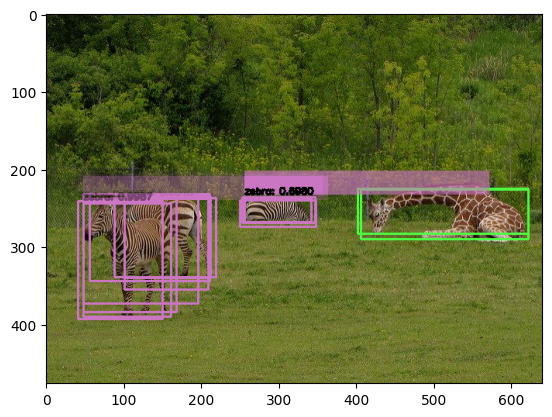

In [62]:
plt.imshow(image)

In [63]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5 , 0.4)

In [64]:
indexes

array([11,  5,  0,  2], dtype=int32)

In [73]:
image = cv2.imread("jungle.jpg")

In [74]:
for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    label = str(labels[class_ids[i]])
    color = colors[class_ids[i]]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255) ,2)

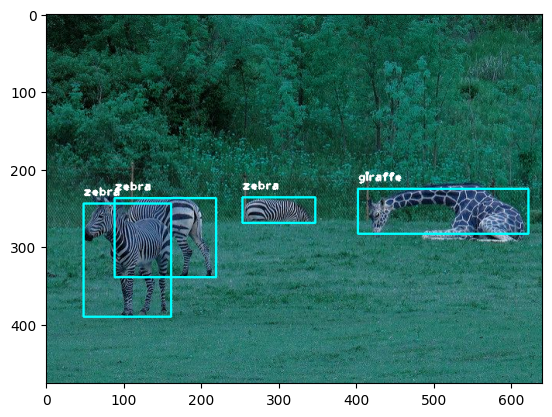

In [75]:
plt.imshow(image)